## Melanie Schwartz (sno122)
DS 4033
Dr. Acosta
4/21/2024

The cancer.csv file contains data from patients with a tumor. The first column labeled as out identifies if the patient has cancer. Each one is labeled as benign or B (for harmless tumors), or malignant or M (for cancerous tumors). Variable out is the variable to predict. This is a binary classification problem since out has two categories. The dataset includes 30 lab measurements (all numeric) associated with breast cancer tumors. These are the predictors.

In [186]:
# Setup libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [187]:
# Load CSV
data = pd.read_csv('cancer.csv')

In [188]:
"""
 1. (10 pts.) Read the csv file into a dataframe. 
 How many cancer patients are in the dataset?
""" 
# Find the number of Malignant datasets
malignant_patient_count = data[data['out']
                        == 'M'].shape[0]

print(f"The number of patients with malignant "
      f"tumors: {malignant_patient_count}")

The number of patients with malignant tumors: 212


In [189]:
"""
2. (10 pts.) Replace the labels in column out
with 0 (for B patients) and 1 (for M patients). 
What is the proportion of patients with cancer?
"""
# Replace labels 'B'/'M' with 0/1
data['out'] = data['out'].map({'B': 0, 'M': 1}).astype(int)

# Proportion of patients with cancer 
cancer_diganoses = data['out'].mean()
print(f"The proportion of patients with cancer "
      f"is: {cancer_diganoses:.2%}")

The proportion of patients with cancer is: 37.26%


In [190]:
"""
3. (10 pts.) Use train_test_split() with test_size = 0.3
 and random_state=42 to split the data into train and test 
 (stratified) sets. How many cancer and 
 non-cancer patients are in the test set?
"""
# Split the data into train and test sets, 
# stratifying by 'out' column
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns='out'), data['out'], 
    test_size=0.3, random_state=42, stratify=data['out']
)

In [191]:
# Count cancer and non cancer patients
test_cancer_count = y_test.value_counts()

In [192]:
print(f"Number of non-cancer patients in "
      f"the test set: {test_cancer_count[0]}")
print(f"Number of cancer patients in"
      f" the test set: {test_cancer_count[1]}")

Number of non-cancer patients in the test set: 107
Number of cancer patients in the test set: 64


In [193]:
"""
4. (10 pts.) Use the train set to build a KNN model. 
Plot the ROC curve (black color) along with a 
45-degree line (red color).
"""
# Build and fit KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [194]:
# Predict probabilities
y_scores = knn.predict_proba(X_test)[:, 1]

In [195]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

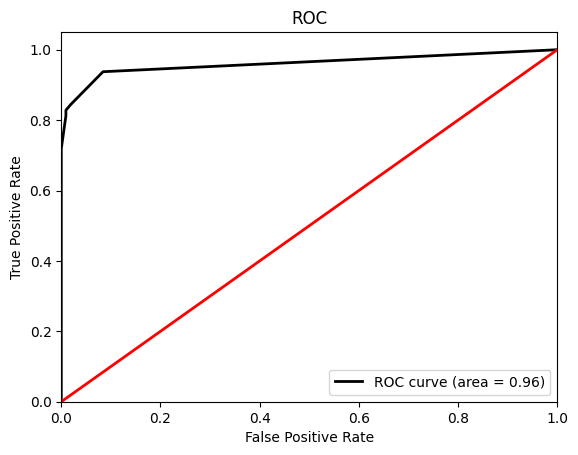

In [196]:
# ROC curve
plt.figure()
plt.plot(fpr, tpr, color='black', lw=2, 
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2)  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [197]:
"""
5. (10 pts.) Use np.argmax(tpr-fpr) to find the 
best threshold and identify it with a black dot 
on the ROC curve.
"""
# Calculate the optimal 
# threshold where tpr - fpr is maximized
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

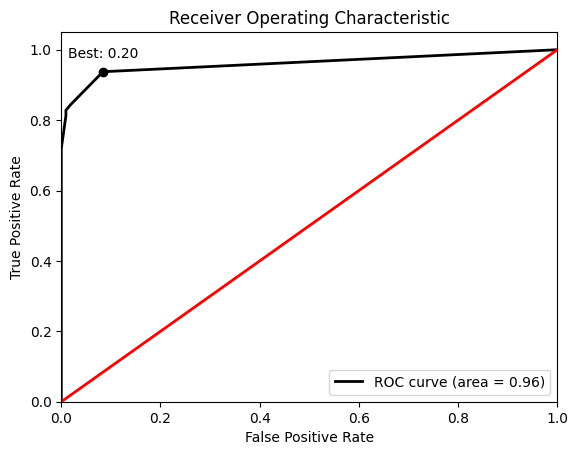

In [198]:
# Plot the ROC curve with the optimal threshold marked
plt.figure()
plt.plot(fpr, tpr, color='black', lw=2, 
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2)  
# Optimal threshold as a black dot
plt.scatter(fpr[optimal_idx], 
            tpr[optimal_idx], color='black')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.annotate(f'Best: '
             f'{optimal_threshold:.2f}', 
             (fpr[optimal_idx], tpr[optimal_idx]),
             textcoords="offset points", 
             xytext=(0,10), ha='center')
plt.show()

In [199]:
"""
6. (10 pts.) Use the train set to build a 
logistic regression model. Plot the ROC curve 
(black color) along with a 45-degree line (red color).
"""
# Build a logistic regression model using the training set
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [200]:
# Predict probabilities for the test set
y_scores_lr = logreg.predict_proba(X_test)[:, 1]

In [201]:
# Compute the ROC curve and AUC for the logistic regression model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

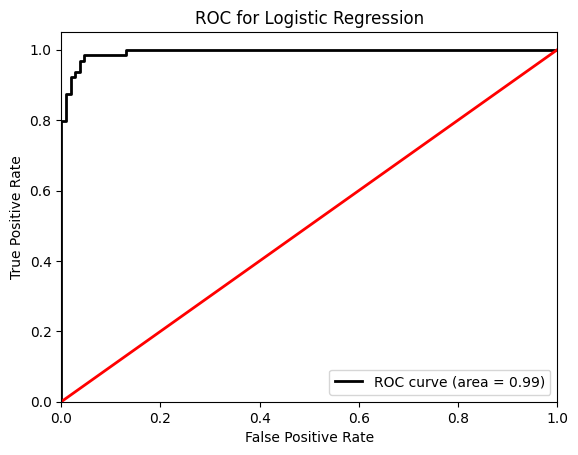

In [202]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='black', 
         lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2)  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [203]:
"""
7. (10 pts.) Find the best threshold 
and identify it with a red dot on the ROC curve.
"""
# Calculate the optimal threshold for the 
# logistic regression model where tpr - fpr is maximized
optimal_idx_lr = np.argmax(tpr_lr - fpr_lr)
optimal_threshold_lr = _[optimal_idx_lr]

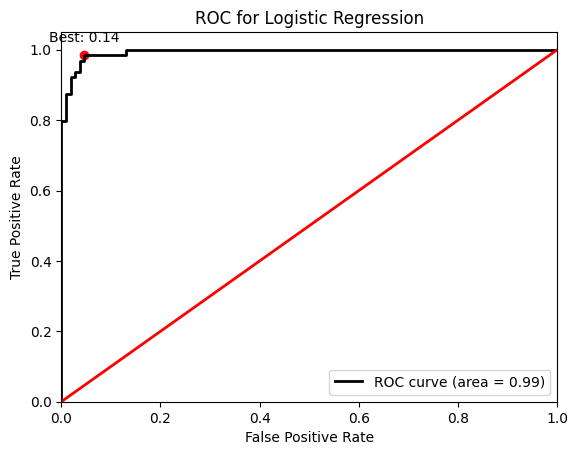

In [204]:
# Plot the ROC curve with the optimal 
# threshold marked for logistic regression
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='black', lw=2, 
         label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2)  
# Optimal threshold as a red dot
plt.scatter(fpr_lr[optimal_idx_lr], 
            tpr_lr[optimal_idx_lr], color='red')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regression')
plt.legend(loc="lower right")
plt.annotate(f'Best: {optimal_threshold_lr:.2f}',
             (fpr_lr[optimal_idx_lr], tpr_lr[optimal_idx_lr]),
             textcoords="offset points", 
             xytext=(0,10), ha='center')
plt.show()

In [205]:
"""
8. (10 pts.) Find the area under the ROC 
curve of each model. Which model is 
the best if AUC is used for comparison?
"""
# compare models for best based on AUC
print(f"AUC for KNN Model: {roc_auc:.2f}")
print(f"AUC for Logistic Regression Model:"
      f" {roc_auc_lr:.2f}")

AUC for KNN Model: 0.96
AUC for Logistic Regression Model: 0.99


In [207]:
# Determine which model has the higher AUC
best_model = "Logistic Regression Model"\
    if roc_auc_lr > roc_auc else "KNN"

print(f"The best model if AUC is "
      f"used for comparison: {best_model}")

The best model if AUC is used for comparison: Logistic Regression Model


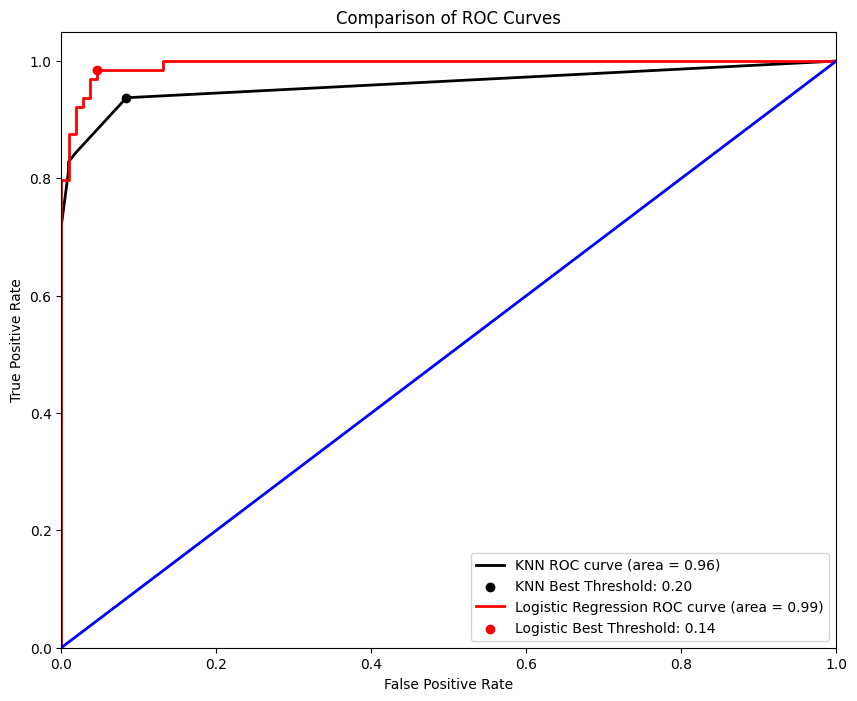

In [208]:
"""
9. (10 pts.) Display both ROC Curves on the 
same plot identifying their best threshold 
values (black for KNN and red for logistic regression). 
Which model has its best threshold closest to the 
point with coordinate (fpr=0, tpr=1)?
"""
# Plot both ROC curves on the same plot 
# with their optimal thresholds
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='black', lw=2, 
         label=f'KNN ROC curve (area = {roc_auc:.2f})')

plt.scatter(fpr[optimal_idx], tpr[optimal_idx], 
            color='black', label=f'KNN Best Threshold: '
                                 f'{optimal_threshold:.2f}')

plt.plot(fpr_lr, tpr_lr, color='red', lw=2,
         label=f'Logistic Regression ROC curve '
               f'(area = {roc_auc_lr:.2f})')

plt.scatter(fpr_lr[optimal_idx_lr], 
            tpr_lr[optimal_idx_lr], color='red',
            label=f'Logistic Best Threshold: '
                  f'{optimal_threshold_lr:.2f}')

plt.plot([0, 1], [0, 1], color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [209]:
# Determine which model's best threshold 
# is closest to the ideal point (fpr=0, tpr=1)
distance_knn = np.sqrt((fpr[optimal_idx] 
                - 0)**2 + (tpr[optimal_idx] - 1)**2)
distance_lr = np.sqrt((fpr_lr[optimal_idx_lr] 
                - 0)**2 + (tpr_lr[optimal_idx_lr] - 1)**2)
closest_model = "KNN"\
    if distance_knn < distance_lr \
    else "Logistic Regression"

print(f"KNN Distance: {distance_knn}")
print(f"Linear Regression Distance: {distance_lr}")
print(f"The closest Model: {closest_model}")

KNN Distance: 0.10479076151556975
Linear Regression Distance: 0.04927207571924516
The closest Model: Logistic Regression


In [210]:
"""
10. (10 pts.) What is the positive 
accuracy rate (tpr) of the best model?
"""
# Print the True Positive Rate (tpr)
# at the best threshold for the 
# Logistic Regression model
tpr_at_best_threshold_lr = tpr_lr[optimal_idx_lr]

print(f"The positive accuracy rate:"
      f" {tpr_at_best_threshold_lr:.2%}")

The positive accuracy rate: 98.44%
